#    Installing libraries

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import renders as rs
from sklearn.decomposition import PCA

In [173]:
# setting directory
import os
os.chdir("C:/Users/Sannia/Desktop/ASA/Coursework") 

# Data Cleaning

In [174]:
#Category Sample File
data= pd.read_csv("category_spends_sample.csv")

In [175]:
#Removing symbols
data.replace(',','', regex=True, inplace=True)
data.replace('£','', regex=True, inplace=True)

In [176]:
#converting into numeric
for col in data.columns:
    data[col] =pd.to_numeric(data[col])

In [177]:
data.describe()

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,...,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3000.00000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8095.724333,69.456163,71.302683,57.347793,60.007530,60.909867,0.0,16.653390,35.48057,23.303350,...,54.740687,92.547613,62.242217,13.736440,8.554260,14.165603,45.330583,6.126987,1.814837,2.016220
std,4686.259488,70.499654,57.966265,55.959350,57.682533,69.805023,0.0,26.377091,41.24047,35.695592,...,67.802126,201.703812,121.500365,25.486136,14.757745,48.469754,123.584361,13.104271,9.450367,4.322232
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-74.000000,0.000000,0.000000,0.000000,0.000000
25%,4044.750000,22.695000,31.390000,21.070000,21.087500,18.145000,0.0,1.500000,8.70000,3.750000,...,12.640000,0.000000,0.000000,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8218.500000,50.935000,56.875000,42.290000,44.030000,39.075000,0.0,7.345000,23.09500,11.685000,...,32.930000,2.030000,12.830000,3.495000,3.760000,0.000000,0.000000,1.990000,0.000000,0.000000
75%,12115.500000,93.405000,95.327500,75.125000,80.922500,77.250000,0.0,19.687500,47.33000,28.782500,...,72.380000,81.030000,65.150000,15.770000,10.647500,6.000000,30.000000,6.720000,0.000000,2.510000
max,16316.000000,1262.970000,708.040000,614.370000,1017.070000,884.450000,0.0,351.730000,454.29000,529.650000,...,713.280000,2488.940000,1005.330000,316.190000,321.490000,946.000000,2137.010000,229.440000,173.060000,65.060000


In [178]:
#Line iems file
line_data= pd.read_csv("lineitems_sample.csv")

In [179]:
#Removing symbols
line_data.replace(',','', regex=True, inplace=True)
line_data.replace('£','', regex=True, inplace=True)

In [180]:
#converting spend column to numeric data type
line_data['spend'] =pd.to_numeric(line_data.spend)

In [181]:
line_data.dtypes

customer_number      int64
purchase_time       object
product_id           int64
category            object
quantity             int64
spend              float64
dtype: object

In [182]:
a=line_data[line_data.category=='BAKERY']

In [183]:
a.describe()

,customer_number,product_id,quantity,spend
count,114874.000000,114874.000000,114874.000000,114874.000000
mean,7651.574926,348380.565803,1.164102,0.997879
std,4494.309974,273754.554714,0.597960,0.478140
min,14.000000,16347.000000,1.000000,0.000000
25%,3789.000000,87346.000000,1.000000,0.720000
50%,7506.000000,227974.000000,1.000000,0.990000
75%,11285.000000,627336.000000,1.000000,1.090000
max,16316.000000,743746.000000,30.000000,12.870000


In [184]:
a=a.drop(['product_id'],axis=1)

In [185]:
a.describe()

,customer_number,quantity,spend
count,114874.000000,114874.000000,114874.000000
mean,7651.574926,1.164102,0.997879
std,4494.309974,0.597960,0.478140
min,14.000000,1.000000,0.000000
25%,3789.000000,1.000000,0.720000
50%,7506.000000,1.000000,0.990000
75%,11285.000000,1.000000,1.090000
max,16316.000000,30.000000,12.870000


In [186]:
b= a.groupby('customer_number', as_index=False).agg({'spend': lambda x: x.sum(),'quantity':lambda x:x.sum()})

In [187]:
b.describe()

,customer_number,spend,quantity
count,2963.000000,2963.000000,2963.000000
mean,8066.447519,38.687266,45.131623
std,4685.939556,36.471073,42.086462
min,14.000000,0.320000,1.000000
25%,4026.500000,15.095000,18.000000
50%,8154.000000,29.820000,35.000000
75%,12096.000000,50.465000,59.000000
max,16316.000000,444.370000,594.000000


In [188]:
new_data=data.merge(b, how='outer', left_on='customer_number', right_on='customer_number')

In [189]:
new_data.describe()

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,...,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,spend,quantity
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3000.00000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2963.000000,2963.000000
mean,8095.724333,69.456163,71.302683,57.347793,60.007530,60.909867,0.0,16.653390,35.48057,23.303350,...,62.242217,13.736440,8.554260,14.165603,45.330583,6.126987,1.814837,2.016220,38.687266,45.131623
std,4686.259488,70.499654,57.966265,55.959350,57.682533,69.805023,0.0,26.377091,41.24047,35.695592,...,121.500365,25.486136,14.757745,48.469754,123.584361,13.104271,9.450367,4.322232,36.471073,42.086462
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.320000,1.000000
25%,4044.750000,22.695000,31.390000,21.070000,21.087500,18.145000,0.0,1.500000,8.70000,3.750000,...,0.000000,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,15.095000,18.000000
50%,8218.500000,50.935000,56.875000,42.290000,44.030000,39.075000,0.0,7.345000,23.09500,11.685000,...,12.830000,3.495000,3.760000,0.000000,0.000000,1.990000,0.000000,0.000000,29.820000,35.000000
75%,12115.500000,93.405000,95.327500,75.125000,80.922500,77.250000,0.0,19.687500,47.33000,28.782500,...,65.150000,15.770000,10.647500,6.000000,30.000000,6.720000,0.000000,2.510000,50.465000,59.000000
max,16316.000000,1262.970000,708.040000,614.370000,1017.070000,884.450000,0.0,351.730000,454.29000,529.650000,...,1005.330000,316.190000,321.490000,946.000000,2137.010000,229.440000,173.060000,65.060000,444.370000,594.000000


In [190]:
#checking for null values in spend column
new_data.spend.isnull().sum()

37

In [194]:
#filling missing values in spend column with 0 as it is assumed that these people do not spend any amount on bakery due to which their record wasn't available.
new_data.spend=new_data.spend.fillna(0)

In [195]:
#checking for null values in spend column
new_data.spend.isnull().sum()

0

In [196]:
#removing bakery and quantity column
new_data= new_data.drop([ 'bakery', 'quantity'], axis=1)

In [197]:
new_data=new_data.rename(columns={'spend':'bakery'})

In [198]:
new_data.describe()

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,newspapers_magazines,prepared_meals,soft_drinks,frozen,...,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,bakery
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8095.724333,69.456163,71.302683,57.347793,60.007530,60.909867,16.653390,35.48057,23.303350,35.466020,...,92.547613,62.242217,13.736440,8.554260,14.165603,45.330583,6.126987,1.814837,2.016220,38.210123
std,4686.259488,70.499654,57.966265,55.959350,57.682533,69.805023,26.377091,41.24047,35.695592,41.477609,...,201.703812,121.500365,25.486136,14.757745,48.469754,123.584361,13.104271,9.450367,4.322232,36.496115
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4044.750000,22.695000,31.390000,21.070000,21.087500,18.145000,1.500000,8.70000,3.750000,8.777500,...,0.000000,0.000000,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,14.635000
50%,8218.500000,50.935000,56.875000,42.290000,44.030000,39.075000,7.345000,23.09500,11.685000,22.275000,...,2.030000,12.830000,3.495000,3.760000,0.000000,0.000000,1.990000,0.000000,0.000000,29.270000
75%,12115.500000,93.405000,95.327500,75.125000,80.922500,77.250000,19.687500,47.33000,28.782500,47.237500,...,81.030000,65.150000,15.770000,10.647500,6.000000,30.000000,6.720000,0.000000,2.510000,50.050000
max,16316.000000,1262.970000,708.040000,614.370000,1017.070000,884.450000,351.730000,454.29000,529.650000,385.800000,...,2488.940000,1005.330000,316.190000,321.490000,946.000000,2137.010000,229.440000,173.060000,65.060000,444.370000


In [199]:
#checking for negative values
np.where(new_data<0)

(array([ 368,  476,  529,  843,  862, 1022, 1071, 1360, 1448, 1519, 1742,
        1800, 1895, 1972, 2004, 2088, 2187, 2295, 2462, 2494, 2495, 2541,
        2637, 2671, 2760, 2849, 2872, 2889, 2978], dtype=int64),
 array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], dtype=int64))

In [200]:
#dropping negative values
new_data=new_data.drop(new_data.index[[368,  476,  529,  843,  862, 1022, 1071, 1360, 1448, 1519, 1742,
        1800, 1895, 1972, 2004, 2088, 2187, 2295, 2462, 2494, 2495, 2541,
        2637, 2671, 2760, 2849, 2872, 2889, 2978]])

In [201]:
new_data.describe()

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,newspapers_magazines,prepared_meals,soft_drinks,frozen,...,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,bakery
count,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,...,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000
mean,8105.698081,69.418775,71.134174,57.347883,60.102605,60.951690,16.619445,35.430488,23.309778,35.418445,...,92.134551,61.937967,13.807105,8.569017,14.398320,45.428859,6.144843,1.829610,2.011114,38.217849
std,4688.012511,70.220421,57.715027,56.013047,57.781169,69.871484,26.391582,41.153761,35.782244,41.401932,...,200.898314,120.757133,25.583499,14.810689,48.628111,123.952605,13.158646,9.494006,4.319896,36.534727
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4052.000000,22.720000,31.435000,21.070000,21.085000,18.130000,1.495000,8.680000,3.750000,8.765000,...,0.000000,0.000000,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,14.645000
50%,8217.000000,51.080000,56.880000,42.260000,44.170000,39.210000,7.290000,23.060000,11.690000,22.260000,...,2.030000,12.800000,3.500000,3.750000,0.000000,0.000000,1.990000,0.000000,0.000000,29.290000
75%,12136.000000,93.460000,95.050000,75.100000,81.175000,77.405000,19.650000,47.305000,28.785000,47.255000,...,80.670000,65.085000,15.940000,10.695000,6.000000,30.000000,6.735000,0.000000,2.510000,50.000000
max,16316.000000,1262.970000,708.040000,614.370000,1017.070000,884.450000,351.730000,454.290000,529.650000,385.800000,...,2488.940000,1005.330000,316.190000,321.490000,946.000000,2137.010000,229.440000,173.060000,65.060000,444.370000


In [202]:
#baskets file
baskets_data= pd.read_csv("baskets_sample.csv")

In [203]:
baskets_data.head()

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,£3.09,3
1,4047,2007-03-01 07:13:00,9,£7.99,5
2,3571,2007-03-01 07:27:00,9,£37.06,6
3,4079,2007-03-01 07:34:00,11,£11.91,5
4,6063,2007-03-01 07:36:00,3,£1.45,1


In [204]:
#Removing symbols
baskets_data.basket_spend.replace(',','', regex=True, inplace=True)
baskets_data.basket_spend.replace('£','', regex=True, inplace=True)

In [205]:
#Converting basket spend to numeric values
baskets_data.basket_spend=pd.to_numeric(baskets_data.basket_spend)

In [206]:
#converting purchase time into date format
baskets_data['purchase_time'] = baskets_data['purchase_time'].astype('datetime64[ns]')

In [207]:
baskets_data.dtypes

customer_number               int64
purchase_time        datetime64[ns]
basket_quantity               int64
basket_spend                float64
basket_categories             int64
dtype: object

In [208]:
baskets_data.describe()

,customer_number,basket_quantity,basket_spend,basket_categories
count,195547.000000,195547.000000,195547.000000,195547.000000
mean,7896.492899,8.955218,11.804010,4.231990
std,4408.251411,9.510890,13.031542,2.478016
min,14.000000,-11.000000,-98.400000,1.000000
25%,4323.000000,3.000000,4.280000,2.000000
50%,7944.000000,6.000000,8.130000,4.000000
75%,11324.000000,11.000000,14.480000,6.000000
max,16316.000000,190.000000,377.280000,16.000000


In [209]:
#checking for null values
baskets_data.isnull().sum(axis=0)

customer_number      0
purchase_time        0
basket_quantity      0
basket_spend         0
basket_categories    0
dtype: int64

In [210]:
#customer file
customers_data= pd.read_csv('customers_sample.csv')

In [211]:
#Removing symbols
customers_data.total_spend.replace(',','', regex=True, inplace=True)
customers_data.average_spend.replace(',','', regex=True, inplace=True)
customers_data.total_spend.replace('£','', regex=True, inplace=True)
customers_data.average_spend.replace('£','', regex=True, inplace=True)

In [212]:
#converting to numeric
customers_data.total_spend=pd.to_numeric(customers_data.total_spend)
customers_data.average_spend=pd.to_numeric(customers_data.average_spend)

In [213]:
customers_data.describe()

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8095.724333,487.105000,583.722000,1.204499,769.412937,1.682477
std,4686.259488,332.824524,405.006359,0.136323,552.769022,0.733105
min,14.000000,6.000000,6.000000,1.000000,7.280000,0.620000
25%,4044.750000,257.000000,307.750000,1.119625,406.120000,1.260000
50%,8218.500000,417.000000,495.000000,1.175889,627.170000,1.490000
75%,12115.500000,628.250000,744.250000,1.250430,957.675000,1.860000
max,16316.000000,3119.000000,4949.000000,2.503686,6588.650000,10.840000


In [214]:
#checking for null values
customers_data.isnull().sum(axis=0)

customer_number     0
baskets             0
total_quantity      0
average_quantity    0
total_spend         0
average_spend       0
dtype: int64

# Basic Statistical Analysis

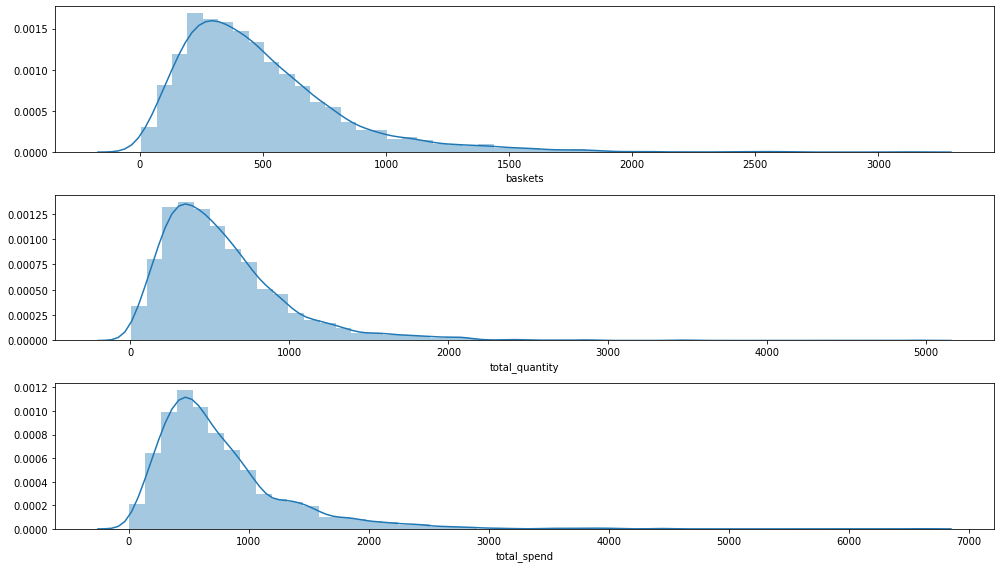

In [215]:
plt.subplot(3, 1, 1); sns.distplot(customers_data.baskets, label = 'No. of Visits')
plt.subplot(3, 1, 2); sns.distplot(customers_data.total_quantity, label = 'Total Purchase Quantity')
plt.subplot(3, 1, 3); sns.distplot(customers_data.total_spend, label = 'Total Spend')


plt.tight_layout()
plt.show()

# Customer Based Summary

In [216]:
customers_data.describe()

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8095.724333,487.105000,583.722000,1.204499,769.412937,1.682477
std,4686.259488,332.824524,405.006359,0.136323,552.769022,0.733105
min,14.000000,6.000000,6.000000,1.000000,7.280000,0.620000
25%,4044.750000,257.000000,307.750000,1.119625,406.120000,1.260000
50%,8218.500000,417.000000,495.000000,1.175889,627.170000,1.490000
75%,12115.500000,628.250000,744.250000,1.250430,957.675000,1.860000
max,16316.000000,3119.000000,4949.000000,2.503686,6588.650000,10.840000


In [217]:
new_data.describe()

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,newspapers_magazines,prepared_meals,soft_drinks,frozen,...,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,bakery
count,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,...,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000
mean,8105.698081,69.418775,71.134174,57.347883,60.102605,60.951690,16.619445,35.430488,23.309778,35.418445,...,92.134551,61.937967,13.807105,8.569017,14.398320,45.428859,6.144843,1.829610,2.011114,38.217849
std,4688.012511,70.220421,57.715027,56.013047,57.781169,69.871484,26.391582,41.153761,35.782244,41.401932,...,200.898314,120.757133,25.583499,14.810689,48.628111,123.952605,13.158646,9.494006,4.319896,36.534727
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4052.000000,22.720000,31.435000,21.070000,21.085000,18.130000,1.495000,8.680000,3.750000,8.765000,...,0.000000,0.000000,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,14.645000
50%,8217.000000,51.080000,56.880000,42.260000,44.170000,39.210000,7.290000,23.060000,11.690000,22.260000,...,2.030000,12.800000,3.500000,3.750000,0.000000,0.000000,1.990000,0.000000,0.000000,29.290000
75%,12136.000000,93.460000,95.050000,75.100000,81.175000,77.405000,19.650000,47.305000,28.785000,47.255000,...,80.670000,65.085000,15.940000,10.695000,6.000000,30.000000,6.735000,0.000000,2.510000,50.000000
max,16316.000000,1262.970000,708.040000,614.370000,1017.070000,884.450000,351.730000,454.290000,529.650000,385.800000,...,2488.940000,1005.330000,316.190000,321.490000,946.000000,2137.010000,229.440000,173.060000,65.060000,444.370000


# RFM Feature Engineering

In [218]:
#Finding maximum date to use it as a reference date
baskets_data.purchase_time.max()


Timestamp('2007-08-31 21:55:00')

In [219]:
#Storing the maximum date as a variable
NOW = dt.datetime(2007,9,1)

In [220]:
baskets_data1= baskets_data

In [221]:
baskets_data1['Recency']=pd.to_datetime(baskets_data['purchase_time'])

In [222]:
baskets_data1.head()

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories,Recency
0,11911,2007-03-01 07:06:00,7,3.09,3,2007-03-01 07:06:00
1,4047,2007-03-01 07:13:00,9,7.99,5,2007-03-01 07:13:00
2,3571,2007-03-01 07:27:00,9,37.06,6,2007-03-01 07:27:00
3,4079,2007-03-01 07:34:00,11,11.91,5,2007-03-01 07:34:00
4,6063,2007-03-01 07:36:00,3,1.45,1,2007-03-01 07:36:00


In [223]:
#Calculating Recency Feature
recency=baskets_data1.groupby('customer_number', as_index=False).agg({'Recency':lambda x:(NOW-x.max()).days})
recency.head()

,customer_number,Recency
0,14,1
1,45,1
2,52,2
3,61,3
4,63,7


In [224]:
#merging this recency data frame with the customers data
rfm_prep=customers_data.merge(recency, how='outer', left_on='customer_number', right_on='customer_number')

In [225]:
rfm_prep.describe()

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,Recency
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8095.724333,487.105000,583.722000,1.204499,769.412937,1.682477,8.121333
std,4686.259488,332.824524,405.006359,0.136323,552.769022,0.733105,20.938531
min,14.000000,6.000000,6.000000,1.000000,7.280000,0.620000,0.000000
25%,4044.750000,257.000000,307.750000,1.119625,406.120000,1.260000,0.000000
50%,8218.500000,417.000000,495.000000,1.175889,627.170000,1.490000,2.000000
75%,12115.500000,628.250000,744.250000,1.250430,957.675000,1.860000,6.000000
max,16316.000000,3119.000000,4949.000000,2.503686,6588.650000,10.840000,164.000000


In [226]:
#Renaming variables
rfm_prep=rfm_prep.rename(columns={'total_spend':'Monetary','baskets':'Frequency'})

In [227]:
rfm_prep.head()

,customer_number,Frequency,total_quantity,average_quantity,Monetary,average_spend,Recency
0,4749,220,260,1.181818,631.12,2.87,3
1,4757,248,333,1.342742,452.42,1.82,3
2,144,226,303,1.340708,261.16,1.16,3
3,572,285,346,1.214035,638.79,2.24,1
4,669,285,324,1.136842,561.42,1.97,1


In [228]:
#Making a data frame including features that have to be used for clustering
segmented_rfm= rfm_prep.drop(['total_quantity'], axis=1)

In [229]:
segmented_rfm.head()

,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency
0,4749,220,1.181818,631.12,2.87,3
1,4757,248,1.342742,452.42,1.82,3
2,144,226,1.340708,261.16,1.16,3
3,572,285,1.214035,638.79,2.24,1
4,669,285,1.136842,561.42,1.97,1


In [230]:
segmented_rfm=segmented_rfm.set_index("customer_number")

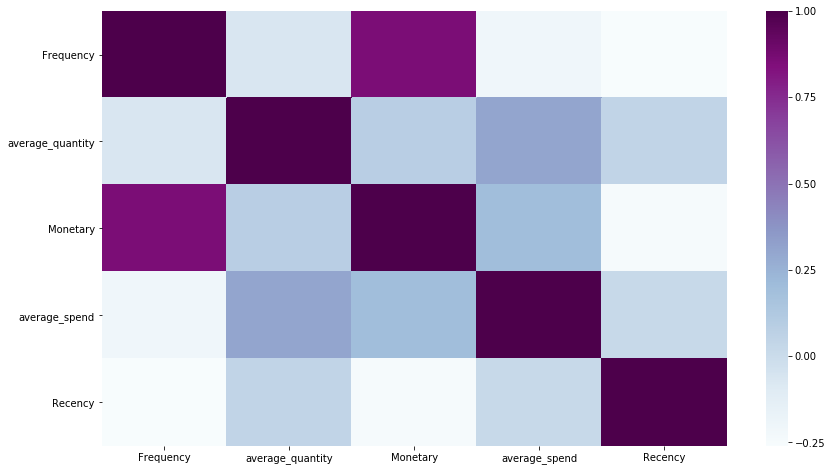

In [231]:
#Checking correlation between independent variables
sns.heatmap(segmented_rfm.corr(),cmap="BuPu")
plt.show()

In [232]:
segmented_rfm=segmented_rfm.reset_index()

In [233]:
#Making qunatiles
quantiles = segmented_rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'customer_number': {0.25: 4044.75, 0.5: 8218.5, 0.75: 12115.5},
 'Frequency': {0.25: 257.0, 0.5: 417.0, 0.75: 628.25},
 'average_quantity': {0.25: 1.119625136904939,
  0.5: 1.1758886275015308,
  0.75: 1.2504304179943482},
 'Monetary': {0.25: 406.12, 0.5: 627.1700000000001, 0.75: 957.6750000000001},
 'average_spend': {0.25: 1.26, 0.5: 1.49, 0.75: 1.86},
 'Recency': {0.25: 0.0, 0.5: 2.0, 0.75: 6.0}}

In [234]:
def RScore(x,p,quantiles):
    if x<=quantiles[p][0.25]:
        return 4
    elif x<=quantiles[p][0.5]:
        return 3
    elif x<=quantiles[p][0.75]:
        return 2
    else:
        return 1
def FMScore(x,p,quantiles):
    if x<=quantiles[p][0.25]:
        return 1
    elif x<=quantiles[p][0.5]:
        return 2
    elif x<=quantiles[p][0.75]:
        return 3
    else:
        return 4

In [235]:
#Calculating RFM Score
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
segmented_rfm['RFMScore']= segmented_rfm.r_quartile.map(str)+segmented_rfm.f_quartile.map(str)+segmented_rfm.m_quartile.map(str)
segmented_rfm['TotalScore'] = segmented_rfm['r_quartile'] + segmented_rfm['f_quartile'] +segmented_rfm['m_quartile']

In [236]:
segmented_rfm.head()

,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,RFMScore,TotalScore
0,4749,220,1.181818,631.12,2.87,3,2,1,3,213,6
1,4757,248,1.342742,452.42,1.82,3,2,1,2,212,5
2,144,226,1.340708,261.16,1.16,3,2,1,1,211,4
3,572,285,1.214035,638.79,2.24,1,3,2,3,323,8
4,669,285,1.136842,561.42,1.97,1,3,2,2,322,7


In [237]:
segmented_rfm.describe()

,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,TotalScore
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,8095.724333,487.105000,1.204499,769.412937,1.682477,8.121333,2.688333,2.497333,2.50000,7.685667
std,4686.259488,332.824524,0.136323,552.769022,0.733105,20.938531,1.136205,1.119707,1.11822,2.760447
min,14.000000,6.000000,1.000000,7.280000,0.620000,0.000000,1.000000,1.000000,1.00000,3.000000
25%,4044.750000,257.000000,1.119625,406.120000,1.260000,0.000000,2.000000,1.000000,1.75000,6.000000
50%,8218.500000,417.000000,1.175889,627.170000,1.490000,2.000000,3.000000,2.000000,2.50000,8.000000
75%,12115.500000,628.250000,1.250430,957.675000,1.860000,6.000000,4.000000,3.250000,3.25000,10.000000
max,16316.000000,3119.000000,2.503686,6588.650000,10.840000,164.000000,4.000000,4.000000,4.00000,12.000000


In [238]:
# calculate averae values for each RFM_score
segmented_rfm_agg = segmented_rfm.groupby('RFMScore').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
})

segmented_rfm_agg.round(1).head(5)

Recency Frequency Monetary      
            mean      mean     mean count
RFMScore                                 
111         45.7     140.0    216.9   293
112         22.4     195.7    471.0    36
113         15.1     198.0    735.9     9
114         10.0     187.0   1520.6     1
121         23.8     296.5    359.2    30

In [239]:
#Making labels
score_labels = ['Brass', 'Bronze', 'Silver', 'Gold','Diamond']
score_groups = pd.qcut(segmented_rfm.TotalScore, q = 5, labels = score_labels)
segmented_rfm['RFM_Level'] = score_groups.values

segmented_rfm.head(5)

,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,RFMScore,TotalScore,RFM_Level
0,4749,220,1.181818,631.12,2.87,3,2,1,3,213,6,Bronze
1,4757,248,1.342742,452.42,1.82,3,2,1,2,212,5,Brass
2,144,226,1.340708,261.16,1.16,3,2,1,1,211,4,Brass
3,572,285,1.214035,638.79,2.24,1,3,2,3,323,8,Silver
4,669,285,1.136842,561.42,1.97,1,3,2,2,322,7,Bronze


# Data Preprocessing for Clustering

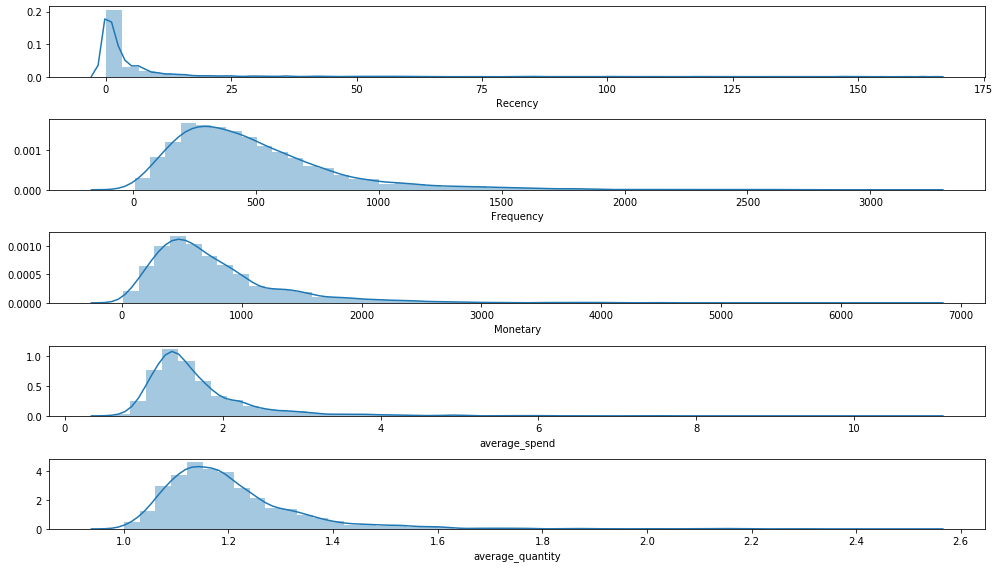

In [240]:
plt.subplot(5, 1, 1); sns.distplot(segmented_rfm.Recency, label = 'Recency')
plt.subplot(5, 1, 2); sns.distplot(segmented_rfm.Frequency, label = 'Frequency')
plt.subplot(5, 1, 3); sns.distplot(segmented_rfm.Monetary, label = 'Monetary')
plt.subplot(5, 1, 4); sns.distplot(segmented_rfm.average_spend, label = 'Average spend')
plt.subplot(5, 1, 5); sns.distplot(segmented_rfm.average_quantity, label = 'Average Quantity')


plt.tight_layout()
plt.show()

In [241]:
rfm_prep.head()

,customer_number,Frequency,total_quantity,average_quantity,Monetary,average_spend,Recency
0,4749,220,260,1.181818,631.12,2.87,3
1,4757,248,333,1.342742,452.42,1.82,3
2,144,226,303,1.340708,261.16,1.16,3
3,572,285,346,1.214035,638.79,2.24,1
4,669,285,324,1.136842,561.42,1.97,1


In [242]:
rfm_prep=rfm_prep.set_index(['customer_number'])

In [243]:
rfm_prep= rfm_prep.drop(['total_quantity'], axis=1)

In [244]:
# unskew the data

segmented_rfm_log = np.log(rfm_prep+1)
segmented_rfm_log.head()

,Frequency,average_quantity,Monetary,average_spend,Recency
customer_number,,,,,
4749,5.398163,0.780159,6.449079,1.353255,1.386294
4757,5.517453,0.851322,6.116819,1.036737,1.386294
144,5.424950,0.850453,5.568955,0.770108,1.386294
572,5.655992,0.794817,6.461140,1.175573,0.693147
669,5.655992,0.759329,6.332249,1.088562,0.693147


In [245]:
# scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(segmented_rfm_log)

In [246]:
# transform into a dataframe
rfm_scaled = pd.DataFrame(rfm_scaled, index = segmented_rfm.index, columns = segmented_rfm_log.columns)
rfm_scaled.head()

,Frequency,average_quantity,Monetary,average_spend,Recency
0,-0.796770,-0.148069,0.042257,1.794967,0.148252
1,-0.629201,1.078645,-0.431355,0.352090,0.148252
2,-0.759142,1.063672,-1.212293,-0.863364,0.148252
3,-0.434593,0.104607,0.059449,0.984990,-0.424760
4,-0.434593,-0.507127,-0.124276,0.588340,-0.424760


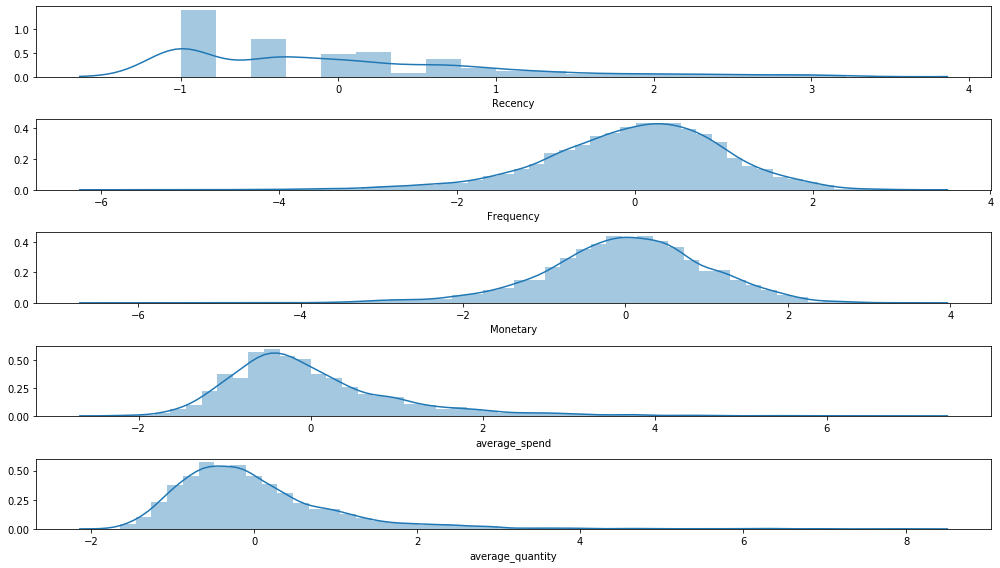

In [247]:
plt.subplot(5, 1, 1); sns.distplot(rfm_scaled.Recency, label = 'Recency')
plt.subplot(5, 1, 2); sns.distplot(rfm_scaled.Frequency, label = 'Frequency')
plt.subplot(5, 1, 3); sns.distplot(rfm_scaled.Monetary, label = 'Monetary')
plt.subplot(5, 1, 4); sns.distplot(rfm_scaled.average_spend, label = 'Average spend')
plt.subplot(5, 1, 5); sns.distplot(rfm_scaled.average_quantity, label = 'Average Quantity')


plt.tight_layout()
plt.show()

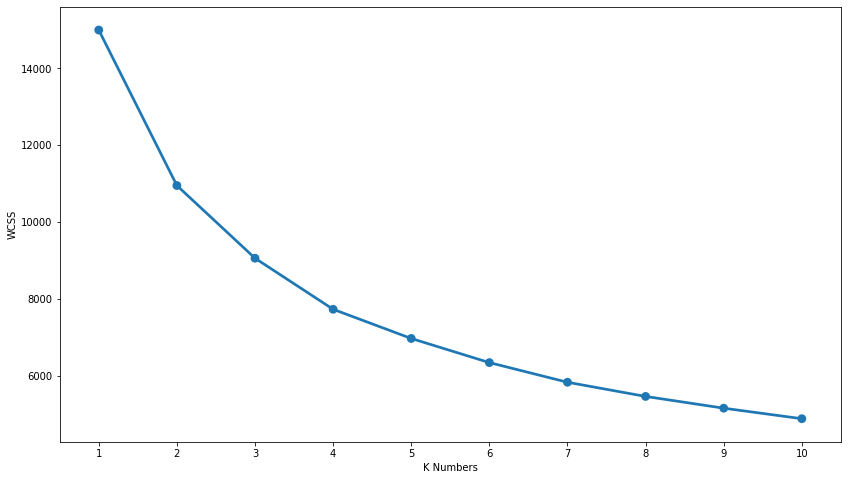

In [248]:
#identifying the optimal level of clusters
wcss = {}

# Elbow method with for loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss[i] = kmeans.inertia_
    
#plotting the graph
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

In [249]:
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(rfm_scaled)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(rfm_scaled)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(rfm_scaled, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))

[2, 3, 4, 5, 6, 7, 8, 9, 10]
For n_clusters = 2. The average silhouette_score is : 0.28375860491622756)
For n_clusters = 3. The average silhouette_score is : 0.27450509350379765)
For n_clusters = 4. The average silhouette_score is : 0.2180530137388068)
For n_clusters = 5. The average silhouette_score is : 0.22927574144471366)
For n_clusters = 6. The average silhouette_score is : 0.2106234228347042)
For n_clusters = 7. The average silhouette_score is : 0.20411158997482612)
For n_clusters = 8. The average silhouette_score is : 0.2096426092275737)
For n_clusters = 9. The average silhouette_score is : 0.20963521347629419)
For n_clusters = 10. The average silhouette_score is : 0.19064271198866659)


# Clustering without PCA

In [250]:
rfm_scaled.head()

,Frequency,average_quantity,Monetary,average_spend,Recency
0,-0.796770,-0.148069,0.042257,1.794967,0.148252
1,-0.629201,1.078645,-0.431355,0.352090,0.148252
2,-0.759142,1.063672,-1.212293,-0.863364,0.148252
3,-0.434593,0.104607,0.059449,0.984990,-0.424760
4,-0.434593,-0.507127,-0.124276,0.588340,-0.424760


In [251]:
#-- Our final clustering solution
clus = KMeans(n_clusters=5,init= 'k-means++', random_state=42).fit(rfm_scaled)
prediction = clus.predict(rfm_scaled)
centres = clus.cluster_centers_

#-- Put the predictions into a pandas dataframe format
assignments = pd.DataFrame(prediction, columns = ['Cluster'])

#-- Put the predictions into a pandas dataframe format
plot_data = pd.concat([assignments, rfm_scaled], axis = 1)


In [252]:
centres

array([[ 1.03767218, -0.15199827,  0.98930613, -0.15667903, -0.52547445],
       [-0.07857262, -0.34823392, -0.33108328, -0.51174747, -0.10609584],
       [-0.10512267,  2.17977051,  0.2327345 ,  0.6927668 ,  0.03357673],
       [-1.5053924 , -0.03765437, -1.51997473,  0.00327016,  1.60173651],
       [-0.5666423 , -0.04488821,  0.26517405,  1.80164275, -0.2427411 ]])

In [253]:
#-- Join the segment assignments to the original data 
final_assignments = pd.concat([assignments, segmented_rfm], axis = 1)

#-- Create a loop that describes summary statistics for each segment
for c, d in final_assignments.groupby('Cluster'):  
    print("SEGMENT", c)
    display(d.describe())

SEGMENT 0


,Cluster,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,TotalScore
count,865.0,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,0.0,7476.409249,865.855491,1.182865,1321.572694,1.547145,1.673988,3.306358,3.764162,3.685549,10.756069
std,0.0,4002.703416,335.738040,0.082613,572.847633,0.366590,4.257899,0.884417,0.427483,0.464565,1.102150
min,0.0,67.000000,415.000000,1.003717,660.160000,0.820000,0.000000,1.000000,2.000000,3.000000,7.000000
25%,0.0,4163.000000,636.000000,1.122427,915.320000,1.290000,0.000000,3.000000,4.000000,3.000000,10.000000
50%,0.0,7587.000000,772.000000,1.174843,1145.100000,1.480000,0.000000,4.000000,4.000000,4.000000,11.000000
75%,0.0,10728.000000,997.000000,1.236295,1541.140000,1.740000,2.000000,4.000000,4.000000,4.000000,12.000000
max,0.0,16292.000000,3119.000000,1.463687,4448.190000,3.050000,56.000000,4.000000,4.000000,4.000000,12.000000


SEGMENT 1


,Cluster,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,TotalScore
count,1167.0,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,1.0,7811.487575,389.651243,1.157902,510.265159,1.348920,3.706084,2.706084,2.282776,1.952871,6.941731
std,0.0,4949.229996,130.989463,0.074533,154.905306,0.272571,6.609948,1.035472,0.789448,0.724721,1.635802
min,1.0,45.000000,106.000000,1.006849,126.420000,0.620000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,1.0,3122.000000,289.000000,1.103001,390.875000,1.150000,0.000000,2.000000,2.000000,1.000000,6.000000
50%,1.0,7789.000000,378.000000,1.148472,505.190000,1.330000,2.000000,3.000000,2.000000,2.000000,7.000000
75%,1.0,12232.000000,473.500000,1.203445,618.265000,1.520000,5.000000,4.000000,3.000000,2.000000,8.000000
max,1.0,16316.000000,943.000000,1.427184,1020.410000,2.060000,74.000000,4.000000,4.000000,4.000000,11.000000


SEGMENT 2


,Cluster,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,TotalScore
count,260.0,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,2.0,8261.488462,405.315385,1.503989,826.237692,2.138500,5.730769,2.569231,2.265385,2.746154,7.580769
std,0.0,4756.753131,227.600511,0.193092,560.676206,0.927154,12.689818,1.082956,0.955958,0.984917,2.101024
min,2.0,14.000000,90.000000,1.283117,205.880000,0.890000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,2.0,4229.000000,259.250000,1.374414,522.970000,1.610000,1.000000,2.000000,1.750000,2.000000,6.000000
50%,2.0,7808.000000,383.000000,1.463268,704.395000,1.880000,2.000000,3.000000,2.000000,3.000000,7.000000
75%,2.0,12618.500000,477.500000,1.546123,1000.975000,2.390000,6.000000,3.000000,3.000000,4.000000,9.000000
max,2.0,16294.000000,2638.000000,2.503686,6588.650000,8.890000,128.000000,4.000000,4.000000,4.000000,12.000000


SEGMENT 3


,Cluster,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,TotalScore
count,402.0,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,3.0,9151.422886,154.885572,1.198440,246.129577,1.657438,40.315920,1.241294,1.097015,1.144279,3.482587
std,0.0,5074.054745,80.956790,0.109117,135.158498,0.537386,42.142641,0.581499,0.304646,0.416708,0.815037
min,3.0,110.000000,6.000000,1.000000,7.280000,0.740000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,3.0,4583.750000,94.750000,1.121611,152.497500,1.312500,9.250000,1.000000,1.000000,1.000000,3.000000
50%,3.0,10462.000000,147.000000,1.177257,221.070000,1.530000,23.000000,1.000000,1.000000,1.000000,3.000000
75%,3.0,13444.750000,203.000000,1.246717,314.970000,1.860000,57.000000,1.000000,1.000000,1.000000,4.000000
max,3.0,16231.000000,519.000000,1.753623,784.760000,5.050000,164.000000,4.000000,3.000000,3.000000,7.000000


SEGMENT 4


,Cluster,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,TotalScore
count,306.0,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,4.0,9402.660131,294.055556,1.196852,836.055882,2.982549,2.921569,2.875817,1.771242,2.807190,7.454248
std,0.0,4386.652329,141.225132,0.092966,449.903282,1.076434,5.492205,1.023144,0.801611,0.960915,2.105309
min,4.0,85.000000,37.000000,1.000000,156.610000,1.940000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,4.0,5657.000000,186.000000,1.129087,538.672500,2.270000,0.000000,2.000000,1.000000,2.000000,6.000000
50%,4.0,9692.500000,277.500000,1.187570,735.270000,2.685000,1.000000,3.000000,2.000000,3.000000,7.000000
75%,4.0,13196.000000,371.500000,1.250759,985.130000,3.237500,3.000000,4.000000,2.000000,4.000000,9.000000
max,4.0,16295.000000,835.000000,1.556818,2683.550000,10.840000,44.000000,4.000000,4.000000,4.000000,12.000000


In [254]:
final_assignments.groupby('Cluster', as_index=False).agg({'Monetary': lambda x: x.sum()})

,Cluster,Monetary
0,0,1143160.38
1,1,595479.44
2,2,214821.80
3,3,98944.09
4,4,255833.10


# Clustering with PCA

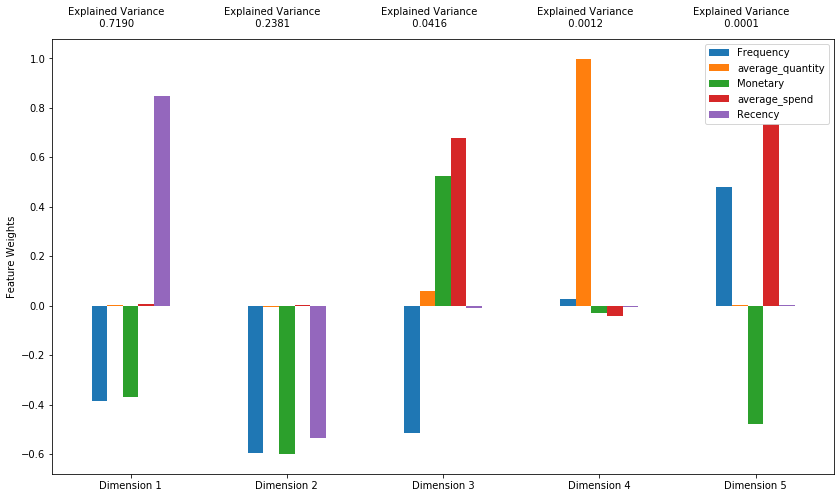

In [255]:
# Applying PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=5)
pca.fit(segmented_rfm_log)


#-- Generate a PCA results plot 
pca_results = rs.pca_results(segmented_rfm_log, pca)

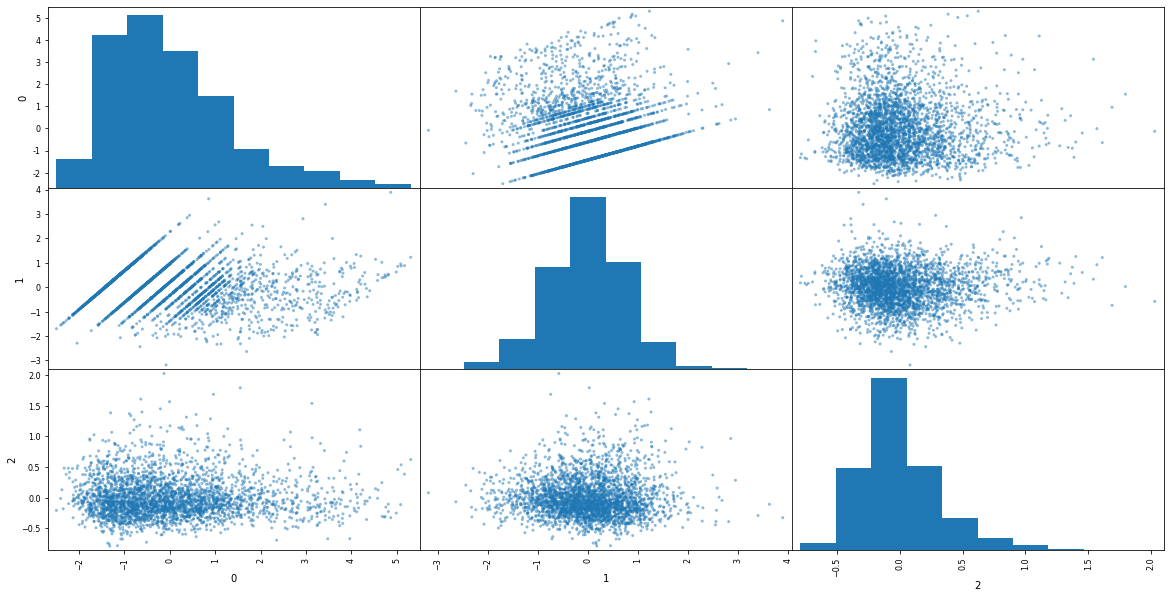

In [256]:
# Fitting with 3 dimensions
pca = PCA(n_components=3)
pca.fit(segmented_rfm_log)

# Transforming the good data using the PCA fit above
reduced_data = pca.transform(segmented_rfm_log)

# Creating a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data)
scatter = pd.plotting.scatter_matrix(reduced_data, figsize = (20,10))

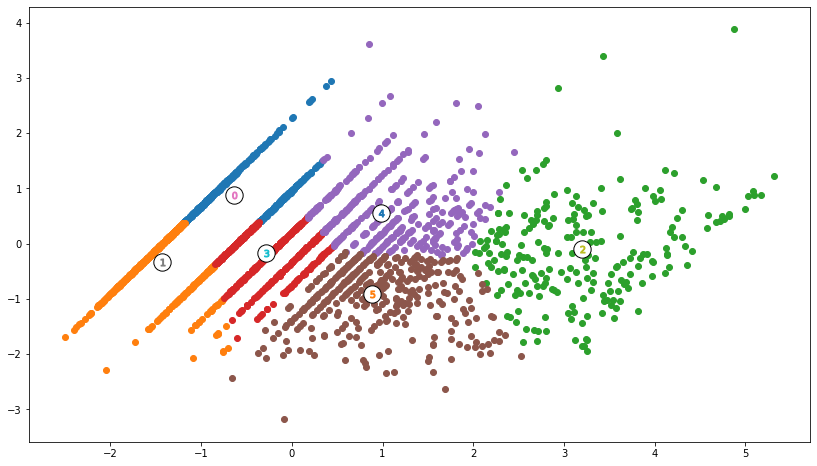

In [257]:
#-- Our final clustering solution
clusterer = KMeans(n_clusters=6).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centres = clusterer.cluster_centers_

#-- Put the predictions into a pandas dataframe format
assignments = pd.DataFrame(preds, columns = ['Cluster'])

#-- Put the predictions into a pandas dataframe format
plot_data = pd.concat([assignments, reduced_data], axis = 1)

#-- Color the points based on assigned cluster (n.b scatter will do this for us automatically)
plt.rcParams['figure.figsize'] = (14.0, 8.0)

for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])
    
#-- Plot where the cluster centers are
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50);

In [258]:
# Join the segment assignments to the original data 
rfm_prep1=rfm_prep
final_assignments = pd.concat([assignments, rfm_prep1], axis = 1)
cluster_summary = final_assignments.groupby('Cluster').mean()
cluster_summary

,Frequency,average_quantity,Monetary,average_spend,Recency
Cluster,,,,,
0.0,480.801980,1.192586,661.034851,1.438614,8.277228
1.0,511.210884,1.178751,729.318299,1.469456,6.170068
2.0,516.916667,1.198708,819.253056,1.586944,13.888889
3.0,482.234234,1.207978,677.568198,1.451712,9.567568
4.0,455.901235,1.188201,636.460494,1.476914,6.135802
5.0,457.543478,1.210406,641.077500,1.479239,7.119565


# Comparing RFM and Clustering 

In [259]:
segmented_rfm.head()

,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,RFMScore,TotalScore,RFM_Level
0,4749,220,1.181818,631.12,2.87,3,2,1,3,213,6,Bronze
1,4757,248,1.342742,452.42,1.82,3,2,1,2,212,5,Brass
2,144,226,1.340708,261.16,1.16,3,2,1,1,211,4,Brass
3,572,285,1.214035,638.79,2.24,1,3,2,3,323,8,Silver
4,669,285,1.136842,561.42,1.97,1,3,2,2,322,7,Bronze


In [260]:
rfm_scaled.head()

,Frequency,average_quantity,Monetary,average_spend,Recency
0,-0.796770,-0.148069,0.042257,1.794967,0.148252
1,-0.629201,1.078645,-0.431355,0.352090,0.148252
2,-0.759142,1.063672,-1.212293,-0.863364,0.148252
3,-0.434593,0.104607,0.059449,0.984990,-0.424760
4,-0.434593,-0.507127,-0.124276,0.588340,-0.424760


In [261]:
rfm_scaled1=rfm_scaled.iloc[:,[0,2,4]]

In [262]:
rfm_scaled1.head()

,Frequency,Monetary,Recency
0,-0.796770,0.042257,0.148252
1,-0.629201,-0.431355,0.148252
2,-0.759142,-1.212293,0.148252
3,-0.434593,0.059449,-0.424760
4,-0.434593,-0.124276,-0.424760


In [263]:
rfm_scaled1['K_Cluster'] = clus.labels_
rfm_scaled1['RFM_Level'] = segmented_rfm.RFM_Level

C:\Users\Sannia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [264]:
rfm_scaled1.head()

,Frequency,Monetary,Recency,K_Cluster,RFM_Level
0,-0.796770,0.042257,0.148252,4,Bronze
1,-0.629201,-0.431355,0.148252,2,Brass
2,-0.759142,-1.212293,0.148252,1,Brass
3,-0.434593,0.059449,-0.424760,4,Silver
4,-0.434593,-0.124276,-0.424760,1,Bronze


In [265]:
# melt the dataframe
rfm_melted = pd.melt(frame= rfm_scaled1, id_vars= [ 'RFM_Level', 'K_Cluster'], 
                     var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

,RFM_Level,K_Cluster,Metrics,Value
0,Bronze,4,Frequency,-0.796770
1,Brass,2,Frequency,-0.629201
2,Brass,1,Frequency,-0.759142
3,Silver,4,Frequency,-0.434593
4,Bronze,1,Frequency,-0.434593


In [266]:
rfm_scaled.head()

,Frequency,average_quantity,Monetary,average_spend,Recency
0,-0.796770,-0.148069,0.042257,1.794967,0.148252
1,-0.629201,1.078645,-0.431355,0.352090,0.148252
2,-0.759142,1.063672,-1.212293,-0.863364,0.148252
3,-0.434593,0.104607,0.059449,0.984990,-0.424760
4,-0.434593,-0.507127,-0.124276,0.588340,-0.424760


In [267]:
rfm_melted.head()

,RFM_Level,K_Cluster,Metrics,Value
0,Bronze,4,Frequency,-0.796770
1,Brass,2,Frequency,-0.629201
2,Brass,1,Frequency,-0.759142
3,Silver,4,Frequency,-0.434593
4,Bronze,1,Frequency,-0.434593


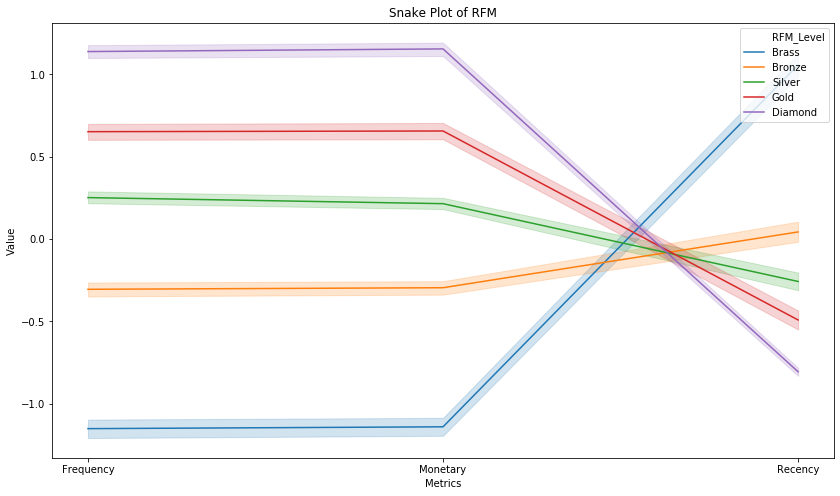

In [268]:
# a snake plot with RFM
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

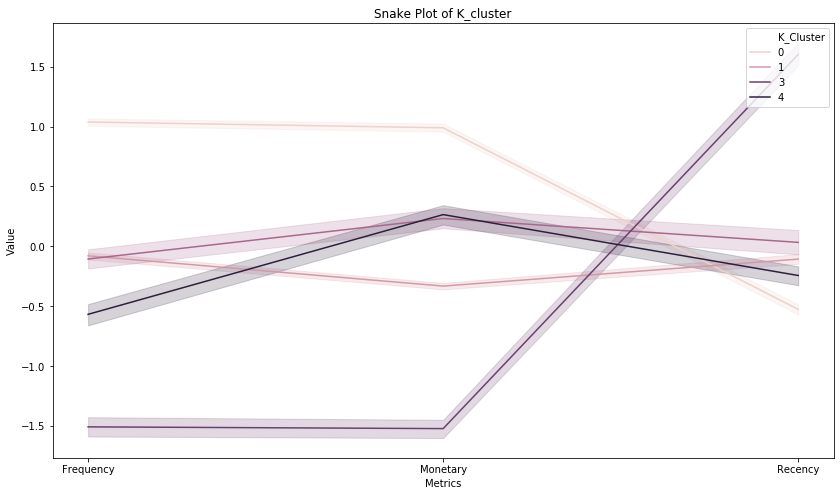

In [269]:
# a snake plot with K-Means
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

# Creating Customer Profiles

In [270]:
#Cluster Summary
cluster_summary = final_assignments.groupby('Cluster').mean()
cluster_summary

,Frequency,average_quantity,Monetary,average_spend,Recency
Cluster,,,,,
0.0,480.801980,1.192586,661.034851,1.438614,8.277228
1.0,511.210884,1.178751,729.318299,1.469456,6.170068
2.0,516.916667,1.198708,819.253056,1.586944,13.888889
3.0,482.234234,1.207978,677.568198,1.451712,9.567568
4.0,455.901235,1.188201,636.460494,1.476914,6.135802
5.0,457.543478,1.210406,641.077500,1.479239,7.119565


# Further Analysis by integrating category data

In [271]:
new_data.describe()

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,newspapers_magazines,prepared_meals,soft_drinks,frozen,...,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,bakery
count,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,...,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000
mean,8105.698081,69.418775,71.134174,57.347883,60.102605,60.951690,16.619445,35.430488,23.309778,35.418445,...,92.134551,61.937967,13.807105,8.569017,14.398320,45.428859,6.144843,1.829610,2.011114,38.217849
std,4688.012511,70.220421,57.715027,56.013047,57.781169,69.871484,26.391582,41.153761,35.782244,41.401932,...,200.898314,120.757133,25.583499,14.810689,48.628111,123.952605,13.158646,9.494006,4.319896,36.534727
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4052.000000,22.720000,31.435000,21.070000,21.085000,18.130000,1.495000,8.680000,3.750000,8.765000,...,0.000000,0.000000,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,14.645000
50%,8217.000000,51.080000,56.880000,42.260000,44.170000,39.210000,7.290000,23.060000,11.690000,22.260000,...,2.030000,12.800000,3.500000,3.750000,0.000000,0.000000,1.990000,0.000000,0.000000,29.290000
75%,12136.000000,93.460000,95.050000,75.100000,81.175000,77.405000,19.650000,47.305000,28.785000,47.255000,...,80.670000,65.085000,15.940000,10.695000,6.000000,30.000000,6.735000,0.000000,2.510000,50.000000
max,16316.000000,1262.970000,708.040000,614.370000,1017.070000,884.450000,351.730000,454.290000,529.650000,385.800000,...,2488.940000,1005.330000,316.190000,321.490000,946.000000,2137.010000,229.440000,173.060000,65.060000,444.370000


In [272]:
# Assign the clusters to datamart
rfm_prep['K_Cluster'] = clus.labels_
rfm_prep.head()

,Frequency,average_quantity,Monetary,average_spend,Recency,K_Cluster
customer_number,,,,,,
4749,220,1.181818,631.12,2.87,3,4
4757,248,1.342742,452.42,1.82,3,2
144,226,1.340708,261.16,1.16,3,1
572,285,1.214035,638.79,2.24,1,4
669,285,1.136842,561.42,1.97,1,1


In [273]:
rfm_prep=rfm_prep.reset_index()

In [274]:
cluster_final=rfm_prep.merge(new_data, how='inner', left_on='customer_number', right_on='customer_number')
cluster_final.describe()

,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,K_Cluster,fruit_veg,dairy,confectionary,...,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,bakery
count,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,...,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000,2971.000000
mean,8105.698081,486.888926,1.204583,768.993925,1.683100,8.051161,1.370246,69.418775,71.134174,57.347883,...,92.134551,61.937967,13.807105,8.569017,14.398320,45.428859,6.144843,1.829610,2.011114,38.217849
std,4688.012511,332.771841,0.136649,552.250415,0.734265,20.753777,1.298630,70.220421,57.715027,56.013047,...,200.898314,120.757133,25.583499,14.810689,48.628111,123.952605,13.158646,9.494006,4.319896,36.534727
min,14.000000,6.000000,1.000000,7.280000,0.620000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4052.000000,257.000000,1.119014,406.460000,1.260000,0.000000,0.000000,22.720000,31.435000,21.070000,...,0.000000,0.000000,0.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,14.645000
50%,8217.000000,417.000000,1.175799,627.380000,1.490000,2.000000,1.000000,51.080000,56.880000,42.260000,...,2.030000,12.800000,3.500000,3.750000,0.000000,0.000000,1.990000,0.000000,0.000000,29.290000
75%,12136.000000,627.500000,1.250743,956.690000,1.860000,6.000000,2.000000,93.460000,95.050000,75.100000,...,80.670000,65.085000,15.940000,10.695000,6.000000,30.000000,6.735000,0.000000,2.510000,50.000000
max,16316.000000,3119.000000,2.503686,6588.650000,10.840000,164.000000,4.000000,1262.970000,708.040000,614.370000,...,2488.940000,1005.330000,316.190000,321.490000,946.000000,2137.010000,229.440000,173.060000,65.060000,444.370000


In [275]:
cluster_final.isnull().sum(axis=0)

customer_number         0
Frequency               0
average_quantity        0
Monetary                0
average_spend           0
Recency                 0
K_Cluster               0
fruit_veg               0
dairy                   0
confectionary           0
grocery_food            0
grocery_health_pets     0
newspapers_magazines    0
prepared_meals          0
soft_drinks             0
frozen                  0
meat                    0
tobacco                 0
drinks                  0
deli                    0
world_foods             0
lottery                 0
cashpoint               0
seasonal_gifting        0
discount_bakery         0
practical_items         0
bakery                  0
dtype: int64

In [276]:
cluster_avg = cluster_final.groupby('K_Cluster').mean().iloc[:, 1:27]
cluster_avg.head()

,Frequency,average_quantity,Monetary,average_spend,Recency,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,...,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,bakery
K_Cluster,,,,,,,,,,,,,,,,,,,,,
0,865.639440,1.182553,1321.827328,1.547970,1.684947,121.404481,121.013477,101.508495,106.248005,113.982415,...,152.220910,95.589510,23.593862,13.900035,25.078891,63.340980,10.306756,2.800607,3.443991,66.217725
1,389.910112,1.157966,510.916370,1.349732,3.681072,58.507692,58.497442,44.031452,47.725385,42.352887,...,23.060199,32.971366,12.009101,7.199948,6.751772,18.079153,4.235480,1.257485,1.443526,31.024408
2,403.259690,1.504447,824.490930,2.143101,5.744186,63.617868,71.693953,62.407481,61.119302,61.189302,...,151.713411,62.470388,10.248992,9.686667,10.315891,41.104496,7.630814,2.828295,2.162287,38.645969
3,154.894472,1.198920,246.213015,1.658518,39.884422,21.684598,24.141281,20.543995,19.832889,20.908467,...,19.334121,23.452286,4.679045,3.432437,4.173367,12.855905,3.368467,1.249899,0.868367,11.991106
4,291.956811,1.196960,830.675249,2.987475,2.860465,31.436080,39.349734,27.128738,28.670299,34.198804,...,231.763256,127.901163,7.973223,4.487076,30.400332,146.334651,4.031860,1.174684,1.494618,20.459402


In [277]:
cluster_avg.iloc[:,0:5]

,Frequency,average_quantity,Monetary,average_spend,Recency
K_Cluster,,,,,
0,865.639440,1.182553,1321.827328,1.547970,1.684947
1,389.910112,1.157966,510.916370,1.349732,3.681072
2,403.259690,1.504447,824.490930,2.143101,5.744186
3,154.894472,1.198920,246.213015,1.658518,39.884422
4,291.956811,1.196960,830.675249,2.987475,2.860465


In [278]:
cluster_avg.iloc[:, 5:10]

,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets
K_Cluster,,,,,
0,121.404481,121.013477,101.508495,106.248005,113.982415
1,58.507692,58.497442,44.031452,47.725385,42.352887
2,63.617868,71.693953,62.407481,61.119302,61.189302
3,21.684598,24.141281,20.543995,19.832889,20.908467
4,31.436080,39.349734,27.128738,28.670299,34.198804


In [279]:
cluster_avg.iloc[:, 10:15]

,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat
K_Cluster,,,,,
0,29.405508,61.972182,43.041155,65.414154,101.344189
1,13.910251,27.596491,14.880225,25.847554,39.534555
2,11.736395,37.082442,30.028992,35.967248,52.840736
3,4.538719,12.027563,7.603141,11.886030,17.641332
4,10.788339,19.503123,14.541960,17.450033,31.587874


In [280]:
cluster_avg.iloc[:, 15:20]

,tobacco,drinks,deli,world_foods,lottery
K_Cluster,,,,,
0,152.220910,95.589510,23.593862,13.900035,25.078891
1,23.060199,32.971366,12.009101,7.199948,6.751772
2,151.713411,62.470388,10.248992,9.686667,10.315891
3,19.334121,23.452286,4.679045,3.432437,4.173367
4,231.763256,127.901163,7.973223,4.487076,30.400332


In [281]:
cluster_avg.iloc[:, 20:25]

,cashpoint,seasonal_gifting,discount_bakery,practical_items,bakery
K_Cluster,,,,,
0,63.340980,10.306756,2.800607,3.443991,66.217725
1,18.079153,4.235480,1.257485,1.443526,31.024408
2,41.104496,7.630814,2.828295,2.162287,38.645969
3,12.855905,3.368467,1.249899,0.868367,11.991106
4,146.334651,4.031860,1.174684,1.494618,20.459402


# Exporting to CSV File

In [282]:
segmented_rfm.head()

,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,RFMScore,TotalScore,RFM_Level
0,4749,220,1.181818,631.12,2.87,3,2,1,3,213,6,Bronze
1,4757,248,1.342742,452.42,1.82,3,2,1,2,212,5,Brass
2,144,226,1.340708,261.16,1.16,3,2,1,1,211,4,Brass
3,572,285,1.214035,638.79,2.24,1,3,2,3,323,8,Silver
4,669,285,1.136842,561.42,1.97,1,3,2,2,322,7,Bronze


In [283]:
segmented_rfm1=segmented_rfm

In [284]:
segmented_rfm1['K_Cluster'] = clus.labels_

In [285]:
final=segmented_rfm1

In [286]:
final.head()

,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,RFMScore,TotalScore,RFM_Level,K_Cluster
0,4749,220,1.181818,631.12,2.87,3,2,1,3,213,6,Bronze,4
1,4757,248,1.342742,452.42,1.82,3,2,1,2,212,5,Brass,2
2,144,226,1.340708,261.16,1.16,3,2,1,1,211,4,Brass,1
3,572,285,1.214035,638.79,2.24,1,3,2,3,323,8,Silver,4
4,669,285,1.136842,561.42,1.97,1,3,2,2,322,7,Bronze,1


In [287]:
final['Cluster_Label']=final['K_Cluster']

In [288]:
final.head()

,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,RFMScore,TotalScore,RFM_Level,K_Cluster,Cluster_Label
0,4749,220,1.181818,631.12,2.87,3,2,1,3,213,6,Bronze,4,4
1,4757,248,1.342742,452.42,1.82,3,2,1,2,212,5,Brass,2,2
2,144,226,1.340708,261.16,1.16,3,2,1,1,211,4,Brass,1,1
3,572,285,1.214035,638.79,2.24,1,3,2,3,323,8,Silver,4,4
4,669,285,1.136842,561.42,1.97,1,3,2,2,322,7,Bronze,1,1


In [289]:
final.Cluster_Label=final.Cluster_Label.replace({0:"Golden Goose",1:"Low Spending Active Loyal Customers",2:"Inactive Potential Loyalists",3:"Churned Customers",4:"Infrequent High Spending Customers"})

In [135]:
final.to_csv('customers_segments.csv', index=False)

In [290]:
final.head()

,customer_number,Frequency,average_quantity,Monetary,average_spend,Recency,r_quartile,f_quartile,m_quartile,RFMScore,TotalScore,RFM_Level,K_Cluster,Cluster_Label
0,4749,220,1.181818,631.12,2.87,3,2,1,3,213,6,Bronze,4,Infrequent High Spending Customers
1,4757,248,1.342742,452.42,1.82,3,2,1,2,212,5,Brass,2,Inactive Potential Loyalists
2,144,226,1.340708,261.16,1.16,3,2,1,1,211,4,Brass,1,Low Spending Active Loyal Customers
3,572,285,1.214035,638.79,2.24,1,3,2,3,323,8,Silver,4,Infrequent High Spending Customers
4,669,285,1.136842,561.42,1.97,1,3,2,2,322,7,Bronze,1,Low Spending Active Loyal Customers
